In [5]:
import sys
import pandas as pd
sys.path.append("/Users/nikita/Desktop/Test Assigment tabby")


from src.dataloader import DataLoader
import tqdm as tqdm
import matplotlib.pyplot as plt

import lightgbm as lgb

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import pickle



In [6]:
dl = DataLoader(path_to_data="/Users/nikita/Desktop/Test Assigment tabby/data/clear_dataset.csv",
                time_column='sample_date',
                threshold_cat_feature=5,
                drop_disbalance=None)

In [7]:
X_train, X_test, y_train, y_test = dl.run()

### Feature Selection using lightGBM

In [8]:
total_samples = len(y_train)  # Assuming y is your target variable
class_weight_0 = total_samples / (2 * np.bincount(y_train)[0])
class_weight_1 = total_samples / (2 * np.bincount(y_train)[1])

# Create a dictionary of class weights
class_weights = {0: class_weight_0, 1: class_weight_1}

Optimal number of features: 70
Max roc_auc_score {0.7589232555350297}


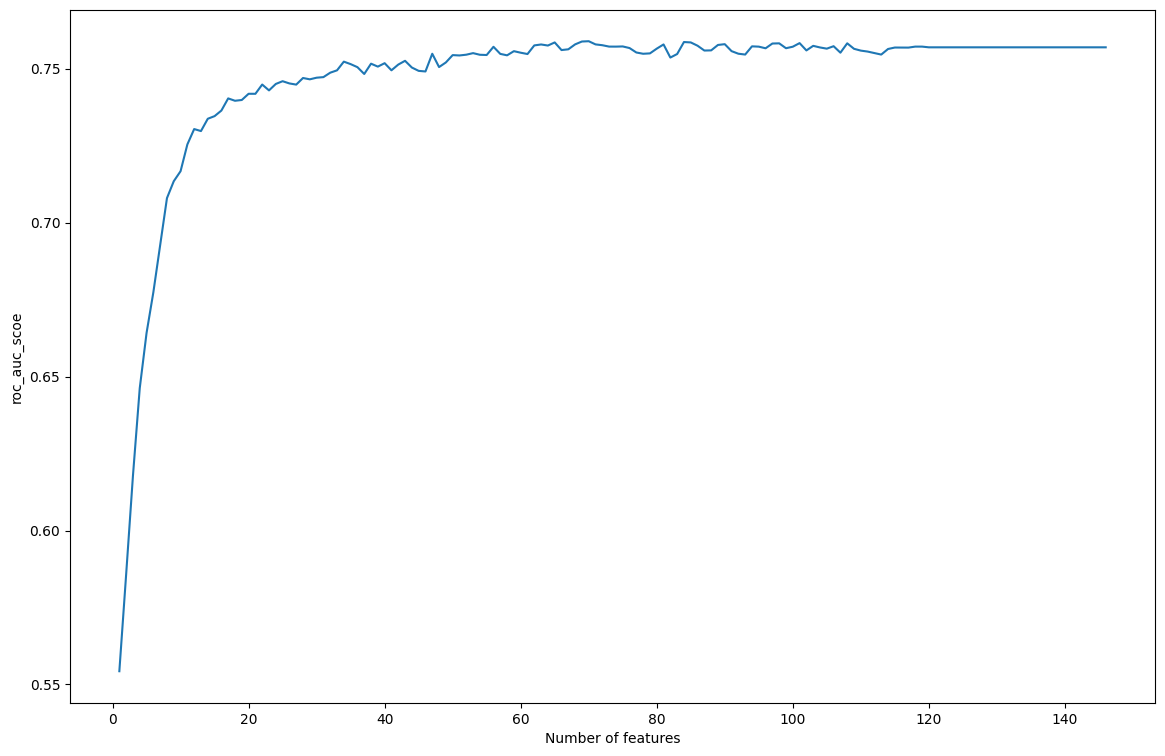

In [10]:
def RFE_feature_selection(clf_lr, X, y):
    rfecv = RFECV(estimator=clf_lr, step=1, cv=StratifiedKFold(5), verbose=0, scoring='roc_auc')
    rfecv.fit(X_train, y_train)

    print(f"Optimal number of features: {rfecv.n_features_}")
    print(f"Max roc_auc_score", {max(rfecv.cv_results_['mean_test_score'])})

    f, ax = plt.subplots(figsize=(14, 9))
    plt.xlabel("Number of features")
    plt.ylabel("roc_auc_scoe")
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.show()
    mask = rfecv.get_support()
    usefull_columns = X.columns[mask]
    return usefull_columns


lgb_classifier = lgb.LGBMClassifier(class_weight=class_weights, verbose=-1)
best_cols = RFE_feature_selection(lgb_classifier, X_train, y_train)


In [19]:
with open('/Users/nikita/Desktop/Test Assigment tabby/data/best_cols.pkl', 'wb') as f:
    pickle.dump(best_cols, f)